## Import all the necessary libraries

In [1]:
## Import all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 

warnings.filterwarnings('ignore')

### loading the data in to a data frame

In [2]:
### loading the data in to a data frame

data = pd.read_csv("uber.csv")
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
data.shape

(200000, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
data.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


### clearing the missing values

In [6]:
perc_missing = (data.isnull().sum()/len(data))*100
perc_missing.sort_values(ascending = False)

dropoff_longitude    0.0005
dropoff_latitude     0.0005
Unnamed: 0           0.0000
key                  0.0000
fare_amount          0.0000
pickup_datetime      0.0000
pickup_longitude     0.0000
pickup_latitude      0.0000
passenger_count      0.0000
dtype: float64

In [7]:
data.drop_duplicates()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [8]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


## Dropped the unwanted missing values

#### - I found that there is 1 record each in dropoff latitdue & dropoff longitude.
#### - I am trying to drop both the records.


In [9]:


perc_missing = data.dropna(inplace=True)

In [10]:
perc_missing = (data.isnull().sum()/len(data))*100
perc_missing.sort_values(ascending = False)

Unnamed: 0           0.0
key                  0.0
fare_amount          0.0
pickup_datetime      0.0
pickup_longitude     0.0
pickup_latitude      0.0
dropoff_longitude    0.0
dropoff_latitude     0.0
passenger_count      0.0
dtype: float64

In [11]:
data.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

## checking for outliers

#### - checking for the outliers for the two descrete columns fare_amount & passenger_count
#### - I have used the boxplot to check for the outliers. 
#### - There are also few records that have 0 values tirying to filter them too.
#### - And in fare amount i can see some negative values, which is not correct, trying to filter them too.

<Axes: xlabel='fare_amount'>

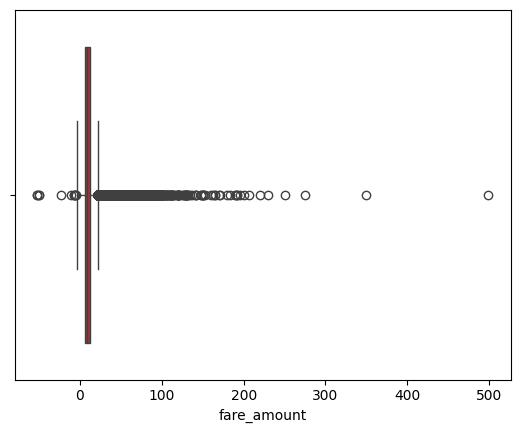

In [12]:
sns.boxplot(x=data['fare_amount'], color="firebrick")

<Axes: xlabel='passenger_count'>

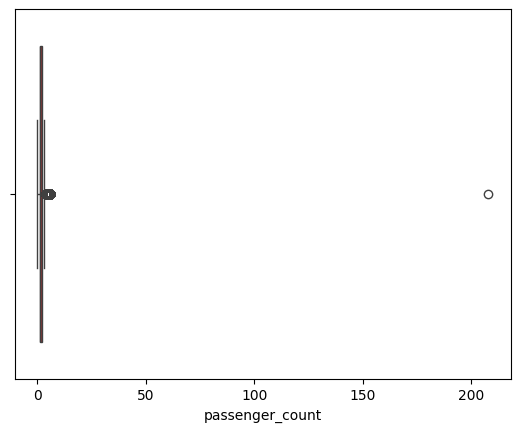

In [13]:
sns.boxplot(x=data['passenger_count'], color="firebrick")

## Observation noted.
### - from the above box plot we can see that fare amount mostly lies between 0 to 200 and it cannot be negative.
### - passenger count is mostly lies betten 1 to 6 but there is an single outlier that lies above 200
### - Based on the observations I am going to filter the outliers from the actual data.

In [14]:
data = data[(data['fare_amount'] > 0) & (data['fare_amount'] < 200)]
data = data[(data['passenger_count'] > 0) & (data['passenger_count'] <= 6)]

In [15]:
data.shape

(199260, 9)

#### Removing the outliers in the laitude & longitude
##### as checked with the geographies of the latitude and longitude they are the geographic locations of the New York City
##### the Geograhic position of the NYC lies between 40 to 42 latitudes and -75 to -72 longitudes.
##### Found there were few 0 values for the data in the latitude and logitude

In [16]:
def is_valid_location(lat, lon):
    return 40 <= lat <= 42 and -75 <= lon <= -72

data = data[
    data.apply(lambda row: is_valid_location(row['pickup_latitude'], row['pickup_longitude']) and
                        is_valid_location(row['dropoff_latitude'], row['dropoff_longitude']), axis=1)
]

In [17]:
data.shape

(195095, 9)

#### converting the pickup time to the date time format

In [18]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'], errors='coerce')

# Extract date-time features
data['hour'] = data['pickup_datetime'].dt.hour
data['day'] = data['pickup_datetime'].dt.day
data['month'] = data['pickup_datetime'].dt.month
data['year'] = data['pickup_datetime'].dt.year
data['day_of_week'] = data['pickup_datetime'].dt.dayofweek



In [19]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,day_of_week
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [20]:
# Haversine distance function
def haversine_distance(lat1, lon1, lat2, lon2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    return 6371 * c  # Radius of Earth in kilometers



In [21]:
# Calculate trip distance

from math import radians, sin, cos, sqrt, atan2, asin

data['trip_distance_km'] = data.apply(lambda row: haversine_distance(
    row['pickup_latitude'], row['pickup_longitude'],
    row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

In [22]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,day_of_week,trip_distance_km
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,1.683323
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,2.457590
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,5.036377
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,1.661683
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,4.475450


#### Univariet analysis

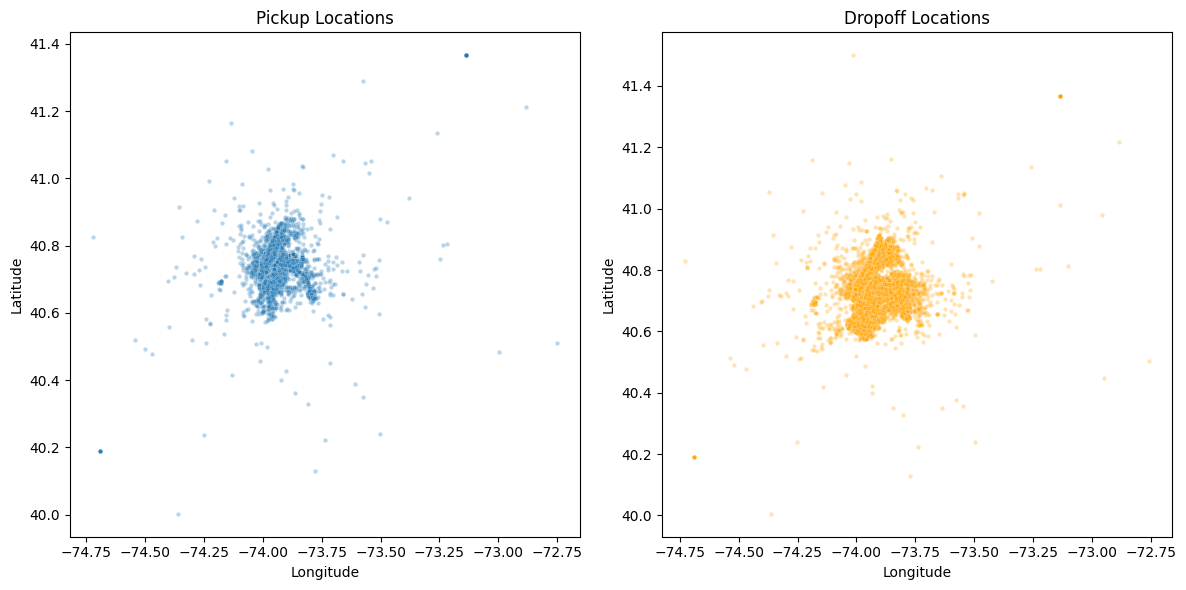

In [23]:
plt.figure(figsize=(12, 6))

# Pickup points
plt.subplot(1, 2, 1)
sns.scatterplot(
    x='pickup_longitude',
    y='pickup_latitude',
    data=data,
    alpha=0.3,
    s=10
)
plt.title('Pickup Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Dropoff points
plt.subplot(1, 2, 2)
sns.scatterplot(
    x='dropoff_longitude',
    y='dropoff_latitude',
    data=data,
    alpha=0.3,
    s=10,
    color='orange'
)
plt.title('Dropoff Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()

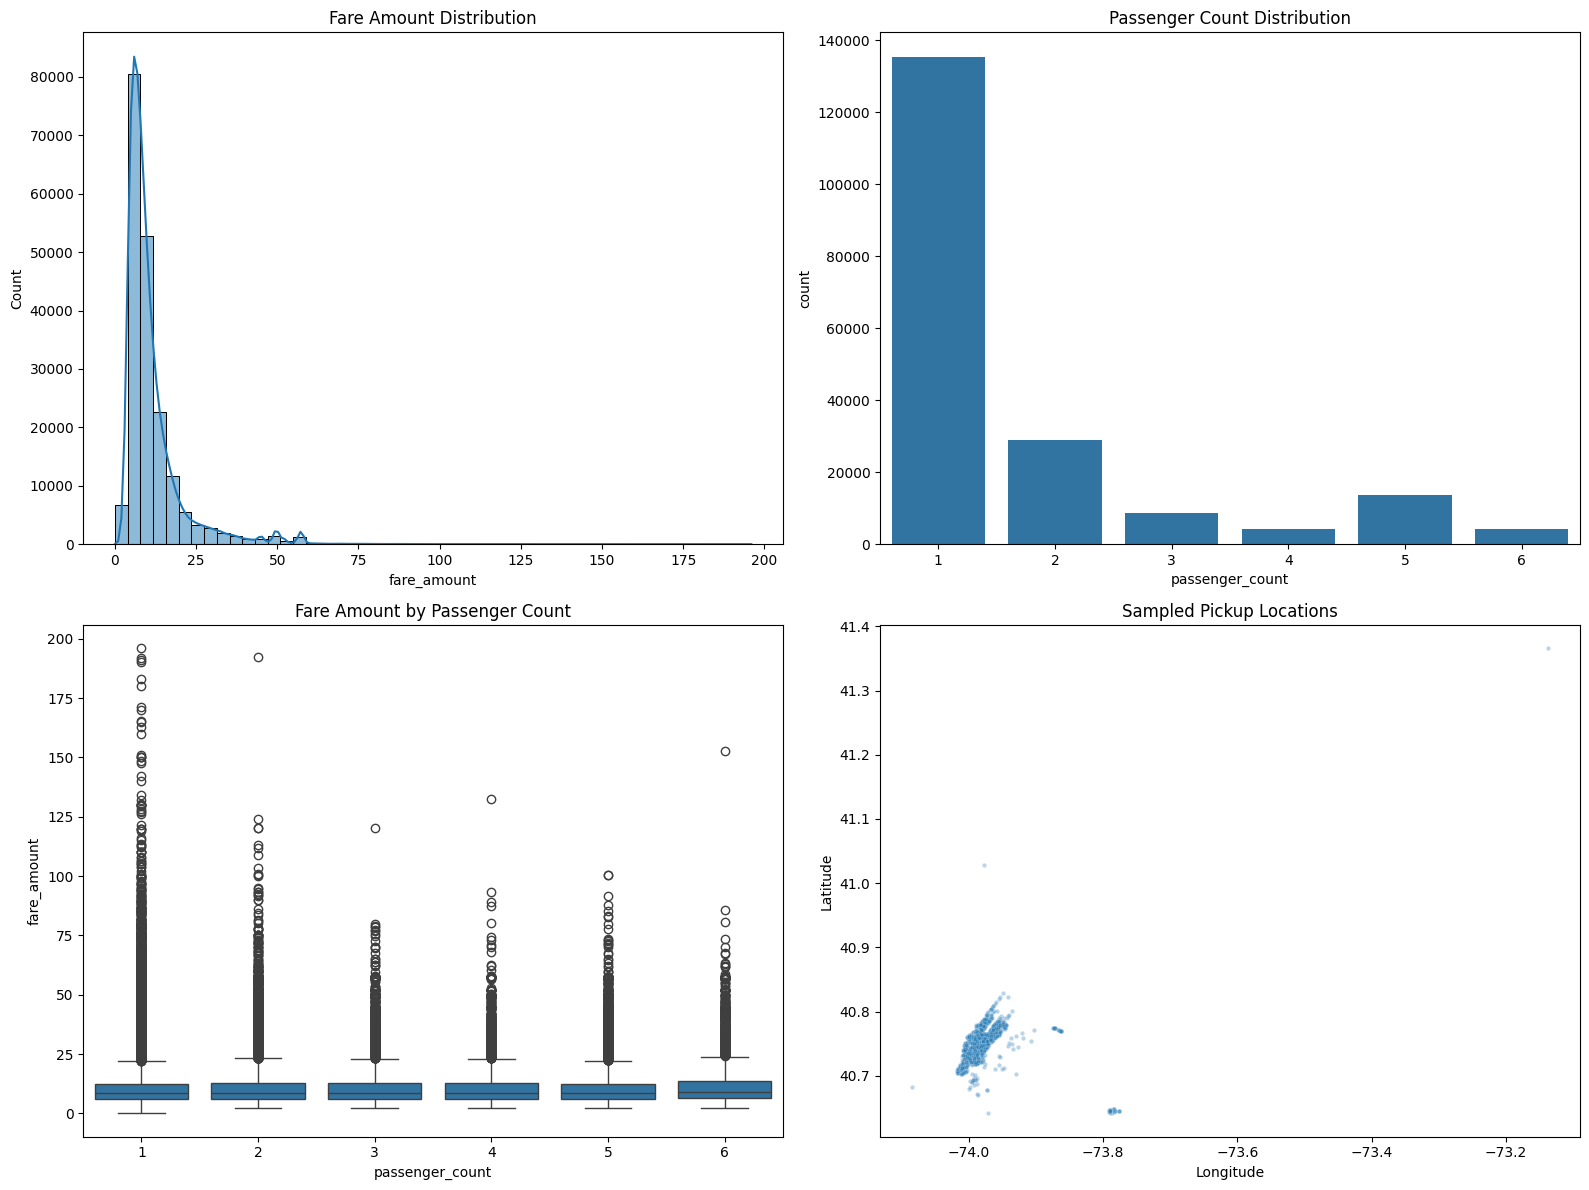

In [24]:
plt.figure(figsize=(16, 12))

# Fare Amount Distribution
plt.subplot(2, 2, 1)
sns.histplot(data['fare_amount'], bins=50, kde=True)
plt.title("Fare Amount Distribution")

# Passenger Count Distribution
plt.subplot(2, 2, 2)
sns.countplot(x='passenger_count', data=data)
plt.title("Passenger Count Distribution")

# Fare vs Passenger Count
plt.subplot(2, 2, 3)
sns.boxplot(x='passenger_count', y='fare_amount', data=data)
plt.title("Fare Amount by Passenger Count")

# Pickup locations (sampled)
plt.subplot(2, 2, 4)
sns.scatterplot(
    x='pickup_longitude',
    y='pickup_latitude',
    data=data.sample(1000),
    alpha=0.3,
    s=10
)
plt.title("Sampled Pickup Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.tight_layout()
plt.show()

#### - From the above graphs we can see that the fair mostly lies between 0 to 25$
#### - most of the rides are for single passengers.
#### - most of the fair contiribution comes from the rides have single passengers.
#### - from the above scatter plot we can see which coordiates the data points lies.

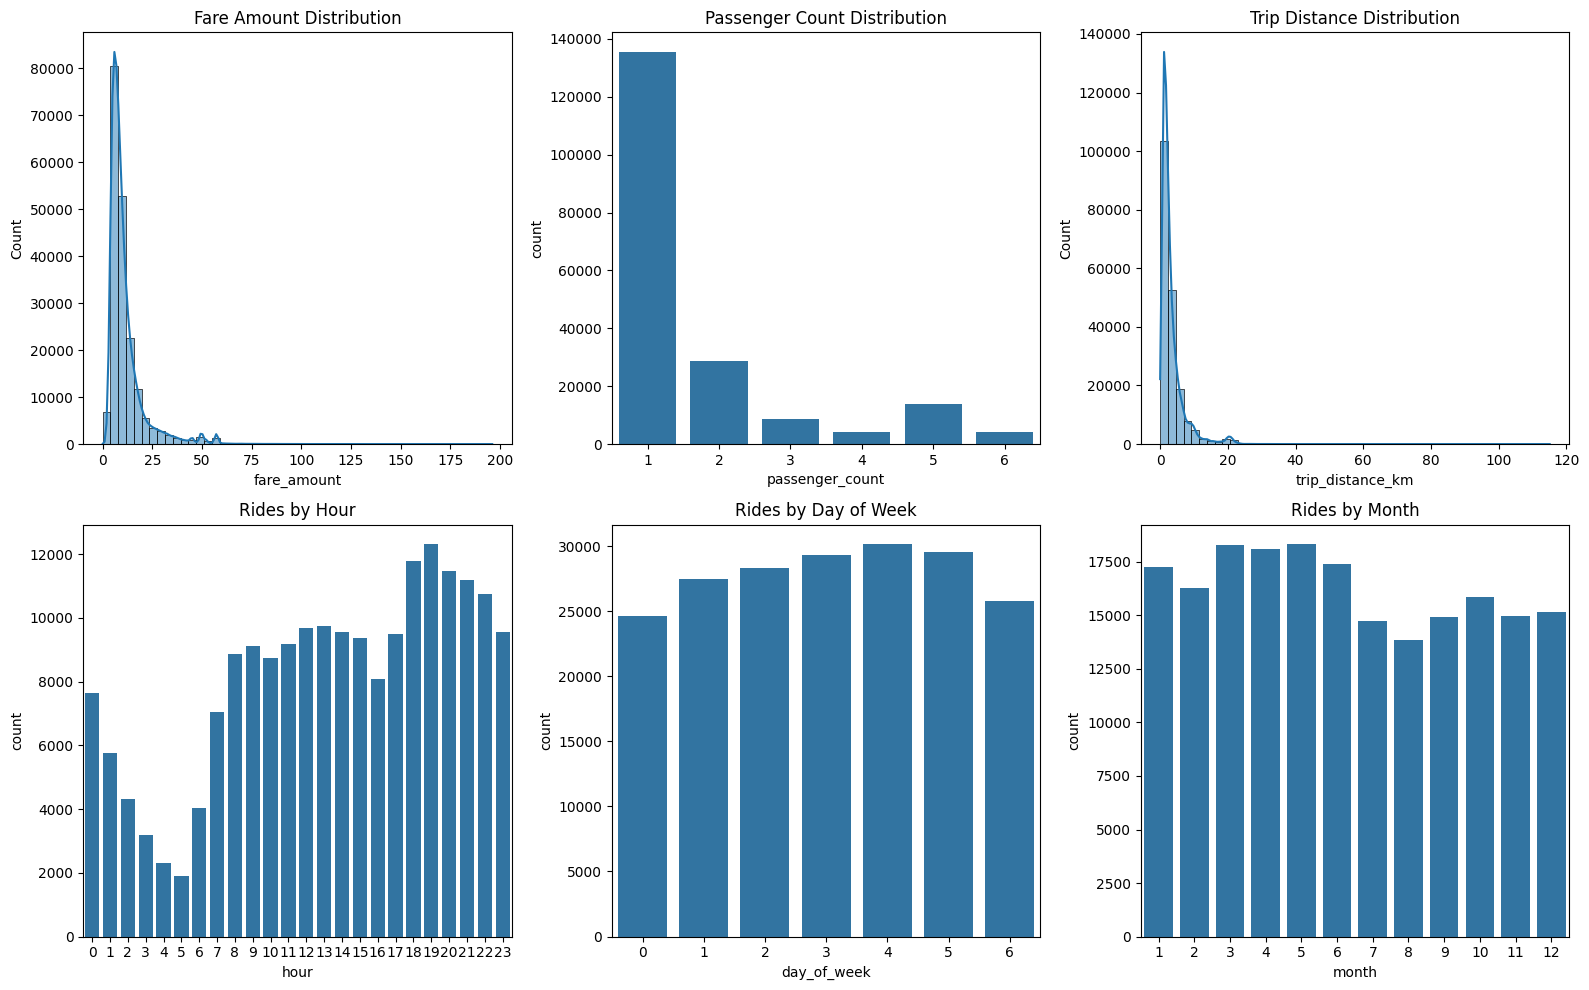

In [25]:
# --- UNIVARIATE ANALYSIS ---
plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
sns.histplot(data['fare_amount'], bins=50, kde=True)
plt.title("Fare Amount Distribution")

plt.subplot(2, 3, 2)
sns.countplot(x='passenger_count', data=data)
plt.title("Passenger Count Distribution")

plt.subplot(2, 3, 3)
sns.histplot(data['trip_distance_km'], bins=50, kde=True)
plt.title("Trip Distance Distribution")

plt.subplot(2, 3, 4)
sns.countplot(x='hour', data=data)
plt.title("Rides by Hour")

plt.subplot(2, 3, 5)
sns.countplot(x='day_of_week', data=data)
plt.title("Rides by Day of Week")

plt.subplot(2, 3, 6)
sns.countplot(x='month', data=data)
plt.title("Rides by Month")

plt.tight_layout()
plt.show()


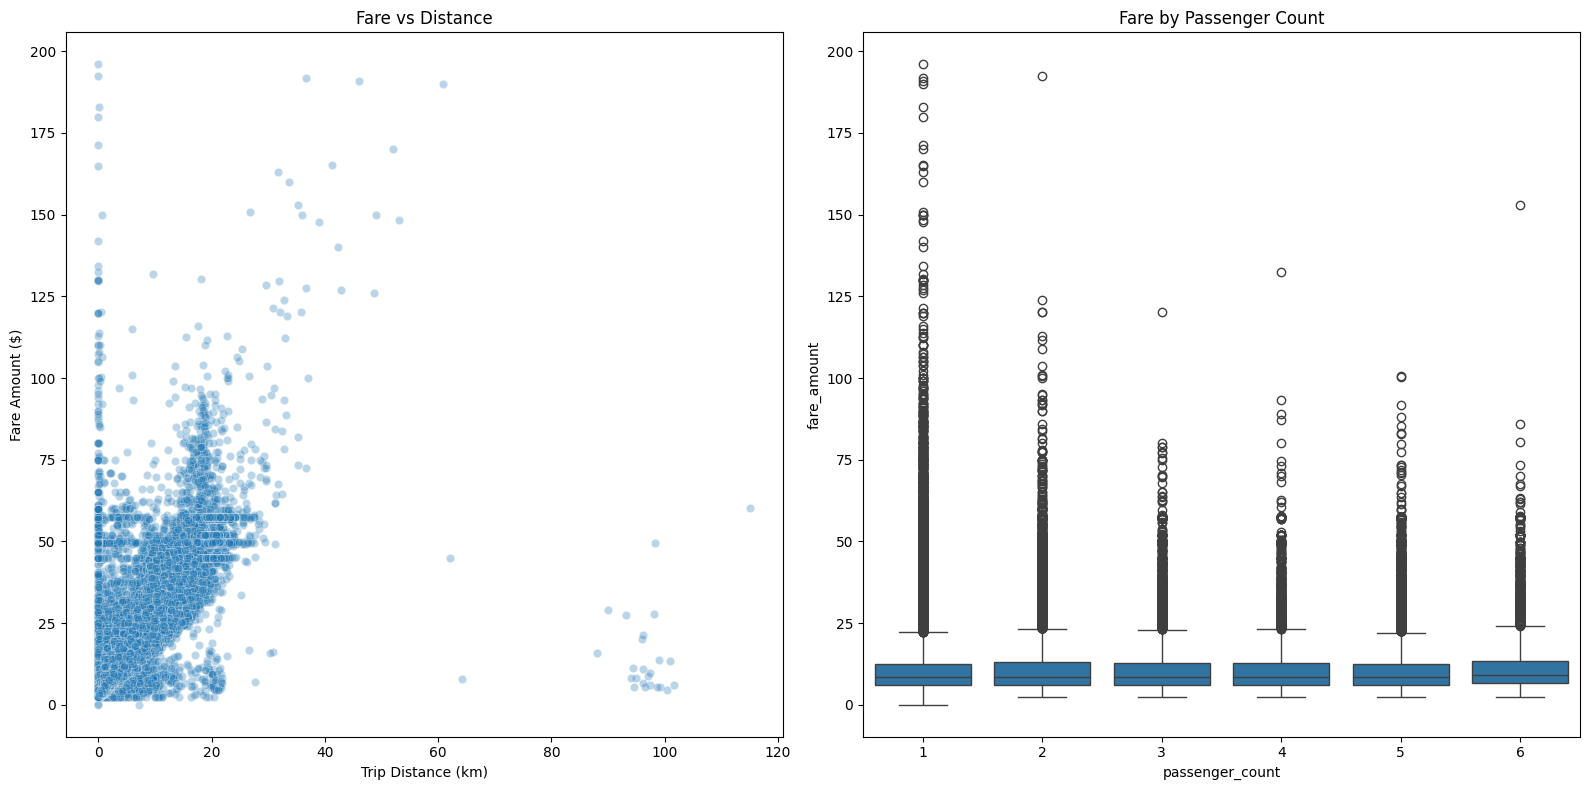

In [26]:
# --- BIVARIATE ANALYSIS ---
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(x='trip_distance_km', y='fare_amount', data=data, alpha=0.3)
plt.title("Fare vs Distance")
plt.xlabel("Trip Distance (km)")
plt.ylabel("Fare Amount ($)")

plt.subplot(1, 2, 2)
sns.boxplot(x='passenger_count', y='fare_amount', data=data)
plt.title("Fare by Passenger Count")

plt.tight_layout()
plt.show()



In [27]:
#### from the above graphs we can see that the most of the rides lies within the distance of 30 to 35 KM
#### we can also notice some outliers at the 100 KM radius.

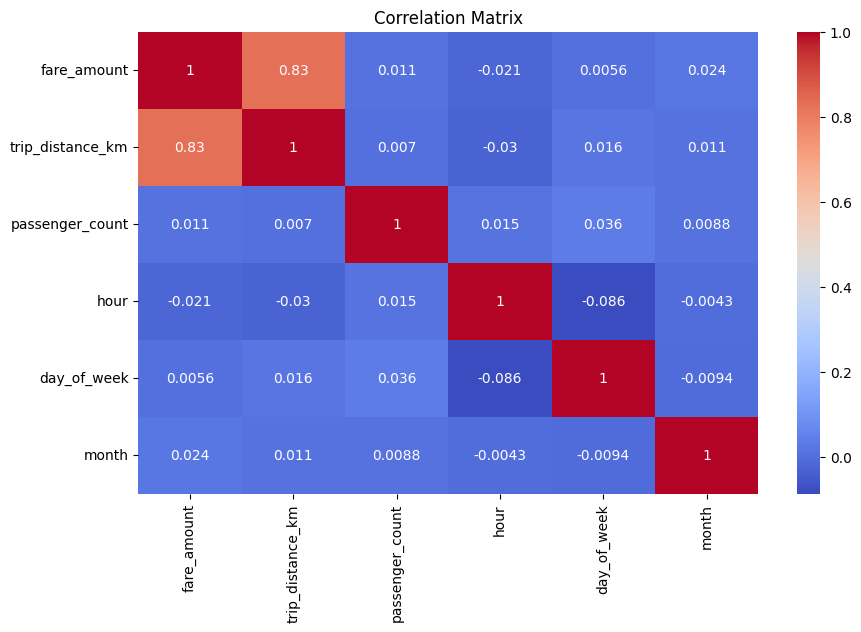

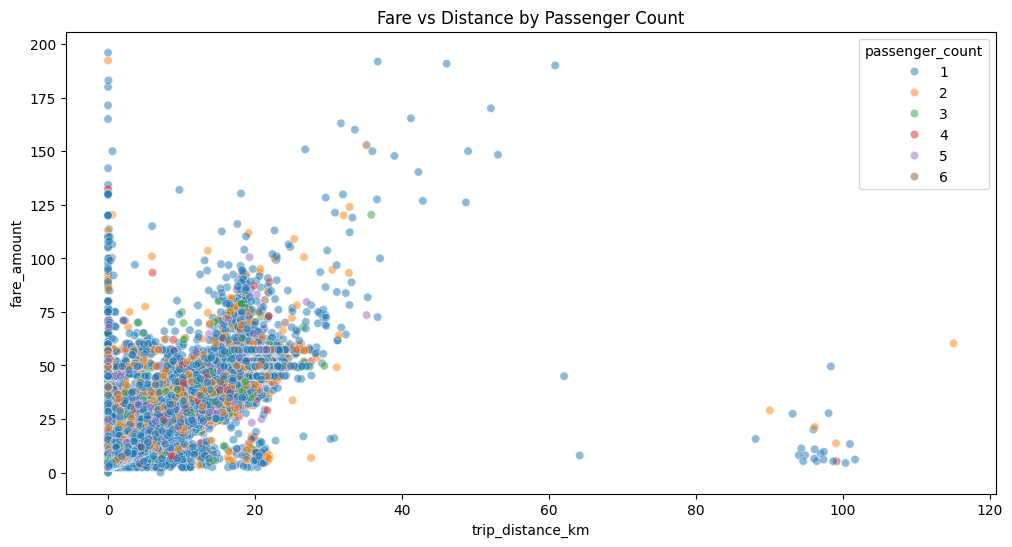

In [28]:
# --- MULTIVARIATE ANALYSIS ---

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data[['fare_amount', 'trip_distance_km', 'passenger_count', 'hour', 'day_of_week', 'month']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Multivariate: Fare vs Distance & Hour (Hue: Passenger Count)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='trip_distance_km', y='fare_amount', hue='passenger_count', palette='tab10', alpha=0.5)
plt.title("Fare vs Distance by Passenger Count")
plt.show()


## --- Feature Engineering ---

In [29]:

# Time of Day Feature
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

data['time_of_day'] = data['hour'].apply(time_of_day)

In [30]:
# Distance Category
def distance_category(km):
    if km < 2:
        return 'short'
    elif 2 <= km <= 6:
        return 'medium'
    else:
        return 'long'

data['distance_category'] = data['trip_distance_km'].apply(distance_category)


In [31]:
# Weekend flag
data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)


In [33]:
# One-hot encoding for categorical features
data = pd.get_dummies(data, columns=['time_of_day', 'distance_category'], drop_first=True)

In [34]:
data.shape

(195095, 21)

In [35]:
data.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month', 'year',
       'day_of_week', 'trip_distance_km', 'is_weekend', 'time_of_day_evening',
       'time_of_day_morning', 'time_of_day_night', 'distance_category_medium',
       'distance_category_short'],
      dtype='object')

## Dropping the unwanted columns like 'Unnamed: 0', 'key','pickup_datetime'.

In [36]:
data = data.drop(['Unnamed: 0', 'key', 'pickup_datetime'], axis=1)
print(data)

        fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0               7.5        -73.999817        40.738354         -73.999512   
1               7.7        -73.994355        40.728225         -73.994710   
2              12.9        -74.005043        40.740770         -73.962565   
3               5.3        -73.976124        40.790844         -73.965316   
4              16.0        -73.925023        40.744085         -73.973082   
...             ...               ...              ...                ...   
199995          3.0        -73.987042        40.739367         -73.986525   
199996          7.5        -73.984722        40.736837         -74.006672   
199997         30.9        -73.986017        40.756487         -73.858957   
199998         14.5        -73.997124        40.725452         -73.983215   
199999         14.1        -73.984395        40.720077         -73.985508   

        dropoff_latitude  passenger_count  hour  day  month  year  \
0     

In [37]:
data.shape

(195095, 18)

## Splitting the data in X and Y 

In [38]:
# Define features (including new engineered ones)
features = [
         'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'year', 'day_of_week', 'trip_distance_km', 'is_weekend',
       'time_of_day_evening', 'time_of_day_morning', 'time_of_day_night',
       'distance_category_medium', 'distance_category_short'
]
X = data[features]
y = data['fare_amount']

In [39]:
# Split data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()

In [41]:
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

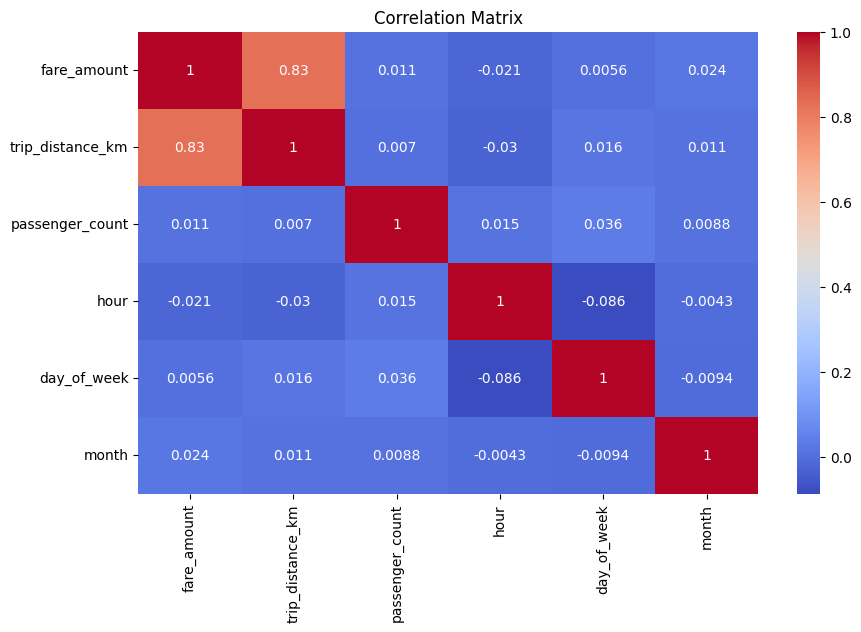

In [42]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[['fare_amount', 'trip_distance_km', 'passenger_count', 'hour', 'day_of_week', 'month']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


# Insights from the Heatmap correlation
### - We cloud see a strong positive corellation between the fair amount and trip_distance_km
### - And also we can see that the passenger count doesnt have any impact on the fair
### - the time and day of the trip might make some impact but not huge difference.